In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
#import molplotly
from CombineMols.CombineMols import CombineMols
import QCflow
from QCflow.load_gaussian import *
from QCflow.energy_calculations import *
from QCflow.torsion_parser import *
from QCflow.find_torsion import *

In [ ]:
g_16_df = pd.read_csv('../Data/Funnel/reorganized_dyads_data.csv')

In [16]:
g_16_df

,Name,SMILES,HOMO /eV,LUMO /eV,EG /eV,SA Score,Planarity,Anionic Reorganisation Energy /eV,Cationic Reorganisation Energy /eV,Linker Type,Fragment Functional Group,Eumelanin Type,Eumelanin Func Type,Eumelanin Bonded Type,Eumelanin Linker Type
0,0_76_single_A,COc1cc2cc[nH]c2c(C2:nc(C(F)(F)F)cc3nsnc:23)c1OC,-5.487701,-2.994533,2.493168,3.152695,0.673979,3.877650e+02,8.600330e+02,single,Trifloro,DHI,Unmethlyated,7 - DHI,single
1,0_84_single_A,COc1cc2cc[nH]c2c(C2:nncc3nsnc:23)c1OC,-5.269517,-2.994647,2.274870,3.169800,0.680468,3.944570e+02,6.528320e+02,single,none,DHI,Unmethlyated,7 - DHI,single
2,0_103_single_A,COc1cc2cc[nH]c2c(C2:scc3nc(C=O)cnc:23)c1OC,-5.244991,-2.861173,2.383818,3.196273,0.881659,4.204450e+02,5.486910e+02,single,carbonyl,DHI,Unmethlyated,7 - DHI,single
3,0_111_single_A,COc1cc2cc[nH]c2c(C2:scc3nc(C#N)cnc:23)c1OC,-5.368393,-2.979620,2.388773,3.200198,0.880582,3.736690e+02,5.649370e+02,single,cyanide,DHI,Unmethlyated,7 - DHI,single
4,0_184_single_A,COc1cc2cc[nH]c2c(C2:nc(C=O)cc3nonc:23)c1OC,-5.493250,-3.162633,2.330617,3.174516,0.722399,3.719630e+02,6.180350e+02,single,carbonyl,DHI,Unmethlyated,7 - DHI,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,9_179_thio_B,COc1cc(C2:c(C#N)ncc3nonc:23)sc1-c1c(OC)c(OC)cc...,-5.551930,-3.343242,2.208688,3.399234,0.695565,2.856280e+02,1.000000e+08,thio,cyanide,DHICA,Methylated,4 - DHICA,thio
3346,9_186_thio_B,COc1cc(C2:nc(C(F)(F)F)cc3nonc:23)sc1-c1c(OC)c(...,-5.533223,-3.142523,2.390701,3.366034,0.688077,1.000000e+08,4.349280e+02,thio,Trifloro,DHICA,Methylated,4 - DHICA,thio
3347,9_193_thio_B,COc1cc(C2:nc(C#N)cc3nonc:23)sc1-c1c(OC)c(OC)cc...,-5.624337,-3.316654,2.307683,3.398758,0.702382,1.000000e+08,1.000000e+08,thio,cyanide,DHICA,Methylated,4 - DHICA,thio
3348,9_214_thio_B,COc1cc(C2:occ3nc(S(=O)(=O)O)cnc:23)sc1-c1c(OC)...,-5.334971,-3.132469,2.202502,3.547168,0.703307,5.527350e+02,1.000000e+08,thio,Sulfonic Acid,DHICA,Methylated,4 - DHICA,thio


In [4]:
g_16_total = g_16_df[(g_16_df['Anionic Reorganisation Energy /eV'] <= 250) | (g_16_df['Cationic Reorganisation Energy /eV'] <= 250)]

In [5]:
g_16_df[(g_16_df['Anionic Reorganisation Energy /eV'] <= 350) | (g_16_df['Cationic Reorganisation Energy /eV'] <= 350)]

,Name,SMILES,HOMO /eV,LUMO /eV,EG /eV,SA Score,Planarity,Anionic Reorganisation Energy /eV,Cationic Reorganisation Energy /eV,Linker Type,Fragment Functional Group,Eumelanin Type,Eumelanin Func Type,Eumelanin Bonded Type,Eumelanin Linker Type
6,0_193_single_A,COc1cc2cc[nH]c2c(C2:nc(C#N)cc3nonc:23)c1OC,-5.555789,-3.220970,2.334819,3.187126,0.771071,347.835,6.059880e+02,single,cyanide,DHI,Unmethlyated,7 - DHI,single
12,0_42_double_A,COc1cc2cc[nH]c2c(C=CC2:c(C#N)ccc3nsnc:23)c1OC,-5.316517,-2.889618,2.426899,3.175605,0.885665,258.391,6.059580e+02,double,cyanide,DHI,Unmethlyated,7 - DHI,double
13,0_47_double_A,COc1cc2cc[nH]c2c(C=CC2:cc(C=O)cc3nsnc:23)c1OC,-5.373963,-2.901763,2.472200,3.217555,0.937171,322.270,5.497190e+02,double,carbonyl,DHI,Unmethlyated,7 - DHI,double
16,0_60_double_A,COc1cc2cc[nH]c2c(C=CC2:c(C=O)ncc3nsnc:23)c1OC,-5.337355,-3.168408,2.168948,3.431391,0.907319,283.475,7.656150e+02,double,carbonyl,DHI,Unmethlyated,7 - DHI,double
22,0_69_double_A,COc1cc2cc[nH]c2c(C=CC2:c(C#N)ncc3nsnc:23)c1OC,-5.412237,-3.167980,2.244257,3.376668,0.896438,259.878,8.696130e+02,double,cyanide,DHI,Unmethlyated,7 - DHI,double
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,9_69_imine_B,COc1cc2c(cc(C(=O)O)n2C)c(N=CC2:c(C#N)ncc3nsnc:...,-5.458122,-3.360100,2.098021,3.456006,0.886977,303.700,1.000000e+08,imine,cyanide,DHICA,Methylated,4 - DHICA,imine
3308,9_152_imine_B,COc1cc2c(cc(C(=O)O)n2C)c(N=CC2:c(C#N)ccc3nonc:...,-5.521827,-3.221546,2.300280,3.250040,0.922221,337.071,4.380490e+02,imine,cyanide,DHICA,Methylated,4 - DHICA,imine
3321,9_179_imine_B,COc1cc2c(cc(C(=O)O)n2C)c(N=CC2:c(C#N)ncc3nonc:...,-5.602398,-3.499568,2.102829,3.422555,0.926597,339.994,4.354350e+02,imine,cyanide,DHICA,Methylated,4 - DHICA,imine
3342,9_79_thio_B,COc1cc(C2:nc(S)cc3nsnc:23)sc1-c1c(OC)c(OC)cc2c...,-5.317072,-2.856301,2.460771,3.511209,0.688843,311.636,1.000000e+08,thio,SH,DHICA,Methylated,4 - DHICA,thio


In [6]:
g_16_total

,Name,SMILES,HOMO /eV,LUMO /eV,EG /eV,SA Score,Planarity,Anionic Reorganisation Energy /eV,Cationic Reorganisation Energy /eV,Linker Type,Fragment Functional Group,Eumelanin Type,Eumelanin Func Type,Eumelanin Bonded Type,Eumelanin Linker Type
24,0_83_double_A,COc1cc2cc[nH]c2c(C=CC2:nc(C#N)cc3nsnc:23)c1OC,-5.504286,-3.094828,2.409458,3.424852,0.981490,247.537,5.414720e+02,double,cyanide,DHI,Unmethlyated,7 - DHI,double
125,0_42_imine_A,COc1cc2cc[nH]c2c(C=NC2:c(C#N)ccc3nsnc:23)c1OC,-5.486237,-2.987613,2.498624,3.251524,0.998652,240.025,1.000000e+08,imine,cyanide,DHI,Unmethlyated,7 - DHI,imine
298,1_39_double_A,COc1cc2cc(C=CC3:c(Br)ccc4nsnc:34)[nH]c2cc1OC,-4.845734,-2.506316,2.339418,2.932517,0.999990,242.560,5.278390e+02,double,Br,DHI,Unmethlyated,2 - DHI,double
307,1_53_double_A,COc1cc2cc(C=CC3:cc(Br)cc4nsnc:34)[nH]c2cc1OC,-4.922054,-2.563587,2.358467,2.919469,0.999989,248.031,2.920650e+02,double,Br,DHI,Unmethlyated,2 - DHI,double
309,1_55_double_A,COc1cc2cc(C=CC3:cc(C#N)cc4nsnc:34)[nH]c2cc1OC,-5.032503,-2.856564,2.175939,3.013156,1.000000,227.058,2.778240e+02,double,cyanide,DHI,Unmethlyated,2 - DHI,double
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,5_98_thio_B,COc1cc2cc(-c3sc(C4:scc5ncc(C#N)nc:45)cc3OC)n(C...,-4.802063,-3.045528,1.756535,3.283970,0.764395,229.286,5.669530e+02,thio,cyanide,DHI,Methylated,2 - DHI,thio
2912,5_152_thio_B,COc1cc2cc(-c3sc(C4:c(C#N)ccc5nonc:45)cc3OC)n(C...,-5.213893,-3.126043,2.087851,3.103068,0.753102,228.468,7.022170e+02,thio,cyanide,DHI,Methylated,2 - DHI,thio
2934,5_179_thio_B,COc1cc2cc(-c3sc(C4:c(C#N)ncc5nonc:45)cc3OC)n(C...,-5.303554,-3.401269,1.902285,3.277188,0.770979,239.981,6.915170e+02,thio,cyanide,DHI,Methylated,2 - DHI,thio
2948,5_193_thio_B,COc1cc2cc(-c3sc(C4:nc(C#N)cc5nonc:45)cc3OC)n(C...,-5.251536,-3.328745,1.922791,3.276676,0.775724,238.403,5.924700e+02,thio,cyanide,DHI,Methylated,2 - DHI,thio


# Loading each run

In [7]:
data_runs_att_1 = {}
rdkit_smi_att_1 = {}
total_run_elites_1 = {}
for i in range(1, 36+1):
    df_run = pd.read_csv(f'attempt_1/MithrilMolGA/MithrilMolGA/dataframes/elite_run_{str(i)}_df.csv')
    total_run_elites_1[str(i)] = df_run
    df_run_cut = df_run[(df_run['Anionic Reorganisation Energy /eV'] <= 250) | (df_run['Cationic Reorganisation Energy /eV'] <= 250)]
    data_runs_att_1[str(i)] = df_run_cut
    smi_run = dict(zip(df_run_cut['Name'], df_run_cut['SMILES']))
    rdkit_smi_att_1[str(i)] = smi_run

In [9]:
data_runs_att_2 = {}
rdkit_smi_att_2 = {}
total_run_elites_2 = {}
for i in range(1, 36+1):
    df_run = pd.read_csv(f'attempt_2/MithrilMolGA/MithrilMolGA/dataframes/elite_run_{str(i)}_df.csv')
    total_run_elites_2[str(i)] = df_run
    df_run_cut = df_run[(df_run['Anionic Reorganisation Energy /eV'] <= 250) | (df_run['Cationic Reorganisation Energy /eV'] <= 250)]
    data_runs_att_2[str(i)] = df_run_cut
    smi_run = dict(zip(df_run_cut['Name'], df_run_cut['SMILES']))
    rdkit_smi_att_2[str(i)] = smi_run

In [10]:
data_runs_att_3 = {}
rdkit_smi_att_3 = {}
total_run_elites_3 = {}
for i in range(1, 36+1):
    df_run = pd.read_csv(f'attempt_3/MithrilMolGA/MithrilMolGA/dataframes/elite_run_{str(i)}_df.csv')
    total_run_elites_3[str(i)] = df_run
    df_run_cut = df_run[(df_run['Anionic Reorganisation Energy /eV'] <= 250) | (df_run['Cationic Reorganisation Energy /eV'] <= 250)]
    data_runs_att_3[str(i)] = df_run_cut
    smi_run = dict(zip(df_run_cut['Name'], df_run_cut['SMILES']))
    rdkit_smi_att_3[str(i)] = smi_run

In [11]:
data_runs_att_4 = {}
rdkit_smi_att_4 = {}
total_run_elites_4 = {}
for i in range(1, 36+1):
    df_run = pd.read_csv(f'attempt_4/MithrilMolGA/MithrilMolGA/dataframes/elite_run_{str(i)}_df.csv')
    total_run_elites_4[str(i)] = df_run
    df_run_cut = df_run[(df_run['Anionic Reorganisation Energy /eV'] <= 250) | (df_run['Cationic Reorganisation Energy /eV'] <= 250)]
    data_runs_att_4[str(i)] = df_run_cut
    smi_run = dict(zip(df_run_cut['Name'], df_run_cut['SMILES']))
    rdkit_smi_att_4[str(i)] = smi_run

In [12]:
data_runs_att_5 = {}
rdkit_smi_att_5 = {}
total_run_elites_5 = {}
for i in range(1, 36+1):
    df_run = pd.read_csv(f'attempt_5/MithrilMolGA/MithrilMolGA/dataframes/elite_run_{str(i)}_df.csv')
    total_run_elites_5[str(i)] = df_run
    df_run_cut = df_run[(df_run['Anionic Reorganisation Energy /eV'] <= 250) | (df_run['Cationic Reorganisation Energy /eV'] <= 250)]
    data_runs_att_5[str(i)] = df_run_cut
    smi_run = dict(zip(df_run_cut['Name'], df_run_cut['SMILES']))
    rdkit_smi_att_5[str(i)] = smi_run

# Matching functions

In [13]:
g_16_smi = dict(zip(g_16_total['Name'], g_16_total['SMILES']))
g_16_smi_canon = {k: Chem.CanonSmiles(v, useChiral=0) for k, v in g_16_smi.items()}

In [14]:
def match_to_g16(rdkit_smi, g_16_smi_canon):
    match_smi = {}
    for k, v in rdkit_smi.items():
        if k in g_16_smi_canon.keys():
            match_smi[k] = v
    return len(match_smi)

# Results

In [15]:
num_match_all_att_1 = {}
total_run_elites_att_1 = {}
percent_match_1 = {}
for i in range(1, 36+1):
    run = f'{i}'
    #print(i)
    #run_dict = globals()[run]  # Access the variable dynamically
    run_dict = rdkit_smi_att_1[run]
    run_all_elites = total_run_elites_1[run]
    
    total_run_elites_att_1[run] = len(run_all_elites)
    num_match_all_att_1[run] = match_to_g16(run_dict, g_16_smi_canon)
    percent_match_1[run] = (num_match_all_att_1[run] / 133)

In [18]:
num_match_all_att_2 = {}
total_run_elites_att_2 = {}
percent_match_2 = {}
for i in range(1, 36+1):
    run = f'{i}'
    #print(i)
    #run_dict = globals()[run]  # Access the variable dynamically
    run_dict = rdkit_smi_att_2[run]
    run_all_elites = total_run_elites_2[run]
    
    total_run_elites_att_2[run] = len(run_all_elites)
    num_match_all_att_2[run] = match_to_g16(run_dict, g_16_smi_canon)
    percent_match_2[run] = (num_match_all_att_2[run] / 133)

In [21]:
num_match_all_att_3 = {}
total_run_elites_att_3 = {}
percent_match_3 = {}
for i in range(1, 36+1):
    run = f'{i}'
    #print(i)
    #run_dict = globals()[run]  # Access the variable dynamically
    run_dict = rdkit_smi_att_3[run]
    run_all_elites = total_run_elites_3[run]
    
    total_run_elites_att_3[run] = len(run_all_elites)
    num_match_all_att_3[run] = match_to_g16(run_dict, g_16_smi_canon)
    percent_match_3[run] = (num_match_all_att_3[run] / 133)

In [24]:
num_match_all_att_4 = {}
total_run_elites_att_4 = {}
percent_match_4 = {}
for i in range(1, 36+1):
    run = f'{i}'
    #print(i)
    #run_dict = globals()[run]  # Access the variable dynamically
    run_dict = rdkit_smi_att_4[run]
    run_all_elites = total_run_elites_4[run]
    
    total_run_elites_att_4[run] = len(run_all_elites)
    num_match_all_att_4[run] = match_to_g16(run_dict, g_16_smi_canon)
    percent_match_4[run] = (num_match_all_att_4[run] / 133)

In [27]:
num_match_all_att_5 = {}
total_run_elites_att_5 = {}
percent_match_5 = {}
for i in range(1, 36+1):
    run = f'{i}'
    #print(i)
    #run_dict = globals()[run]  # Access the variable dynamically
    run_dict = rdkit_smi_att_5[run]
    run_all_elites = total_run_elites_5[run]
    
    total_run_elites_att_5[run] = len(run_all_elites)
    num_match_all_att_5[run] = match_to_g16(run_dict, g_16_smi_canon)
    percent_match_5[run] = (num_match_all_att_5[run] / 133)

# Similarity %

In [ ]:
run_1_sim = pd.read_csv('../Data/GA/SA_score_weight_change/weight_0/run_df.csv')
run_2_sim = pd.read_csv('../Data/GA/SA_score_weight_change/weight_025/run_df.csv')
run_3_sim = pd.read_csv('../Data/GA/SA_score_weight_change/weight_05/run_df.csv')
run_4_sim = pd.read_csv('../Data/GA/SA_score_weight_change/weight_075/run_df.csv')
run_5_sim = pd.read_csv('../Data/GA/SA_score_weight_change/weight_1/run_df.csv')

In [35]:
import matplotlib.pyplot as plt

# Generate a palette with different shades of grey
num_shades = 10  # Number of shades
grey_palette = [f'#{int(255 * (1 - i / (num_shades - 1))):02x}' * 3 for i in range(num_shades)]

In [36]:
grey = sns.color_palette("Greys", n_colors=10)
#bright_pal = sns.color_palette("bright")
colors = [grey.as_hex()[0], grey.as_hex()[3], grey.as_hex()[4], grey.as_hex()[8], grey.as_hex()[2]]

In [37]:
blues = sns.color_palette("Greens", n_colors=10)

In [38]:
blues

[(0.9176931949250289, 0.9684275278738947, 0.901361014994233),
 (0.8459054209919262, 0.9399307958477509, 0.8228219915417148),
 (0.7558477508650518, 0.9033910034602076, 0.7290426758938869),
 (0.6436447520184544, 0.8561476355247981, 0.6197923875432525),
 (0.5185697808535179, 0.7983391003460207, 0.5150941945405614),
 (0.3827450980392157, 0.7332564398308343, 0.42737408688965783),
 (0.2452133794694348, 0.6602537485582468, 0.35695501730103807),
 (0.1566320645905421, 0.5657670126874279, 0.28608996539792386),
 (0.06082276047673972, 0.47958477508650516, 0.21599384851980008),
 (0.0, 0.38268358323721646, 0.15398692810457515)]

In [39]:
width = 7 * 0.3937
height = 5 * 0.3937

In [40]:
blind = sns.color_palette("colorblind")

In [41]:
blind

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

/var/folders/_1/1l34t_9j7_7g2f00h546gntm0000gn/T/ipykernel_3906/1611498927.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


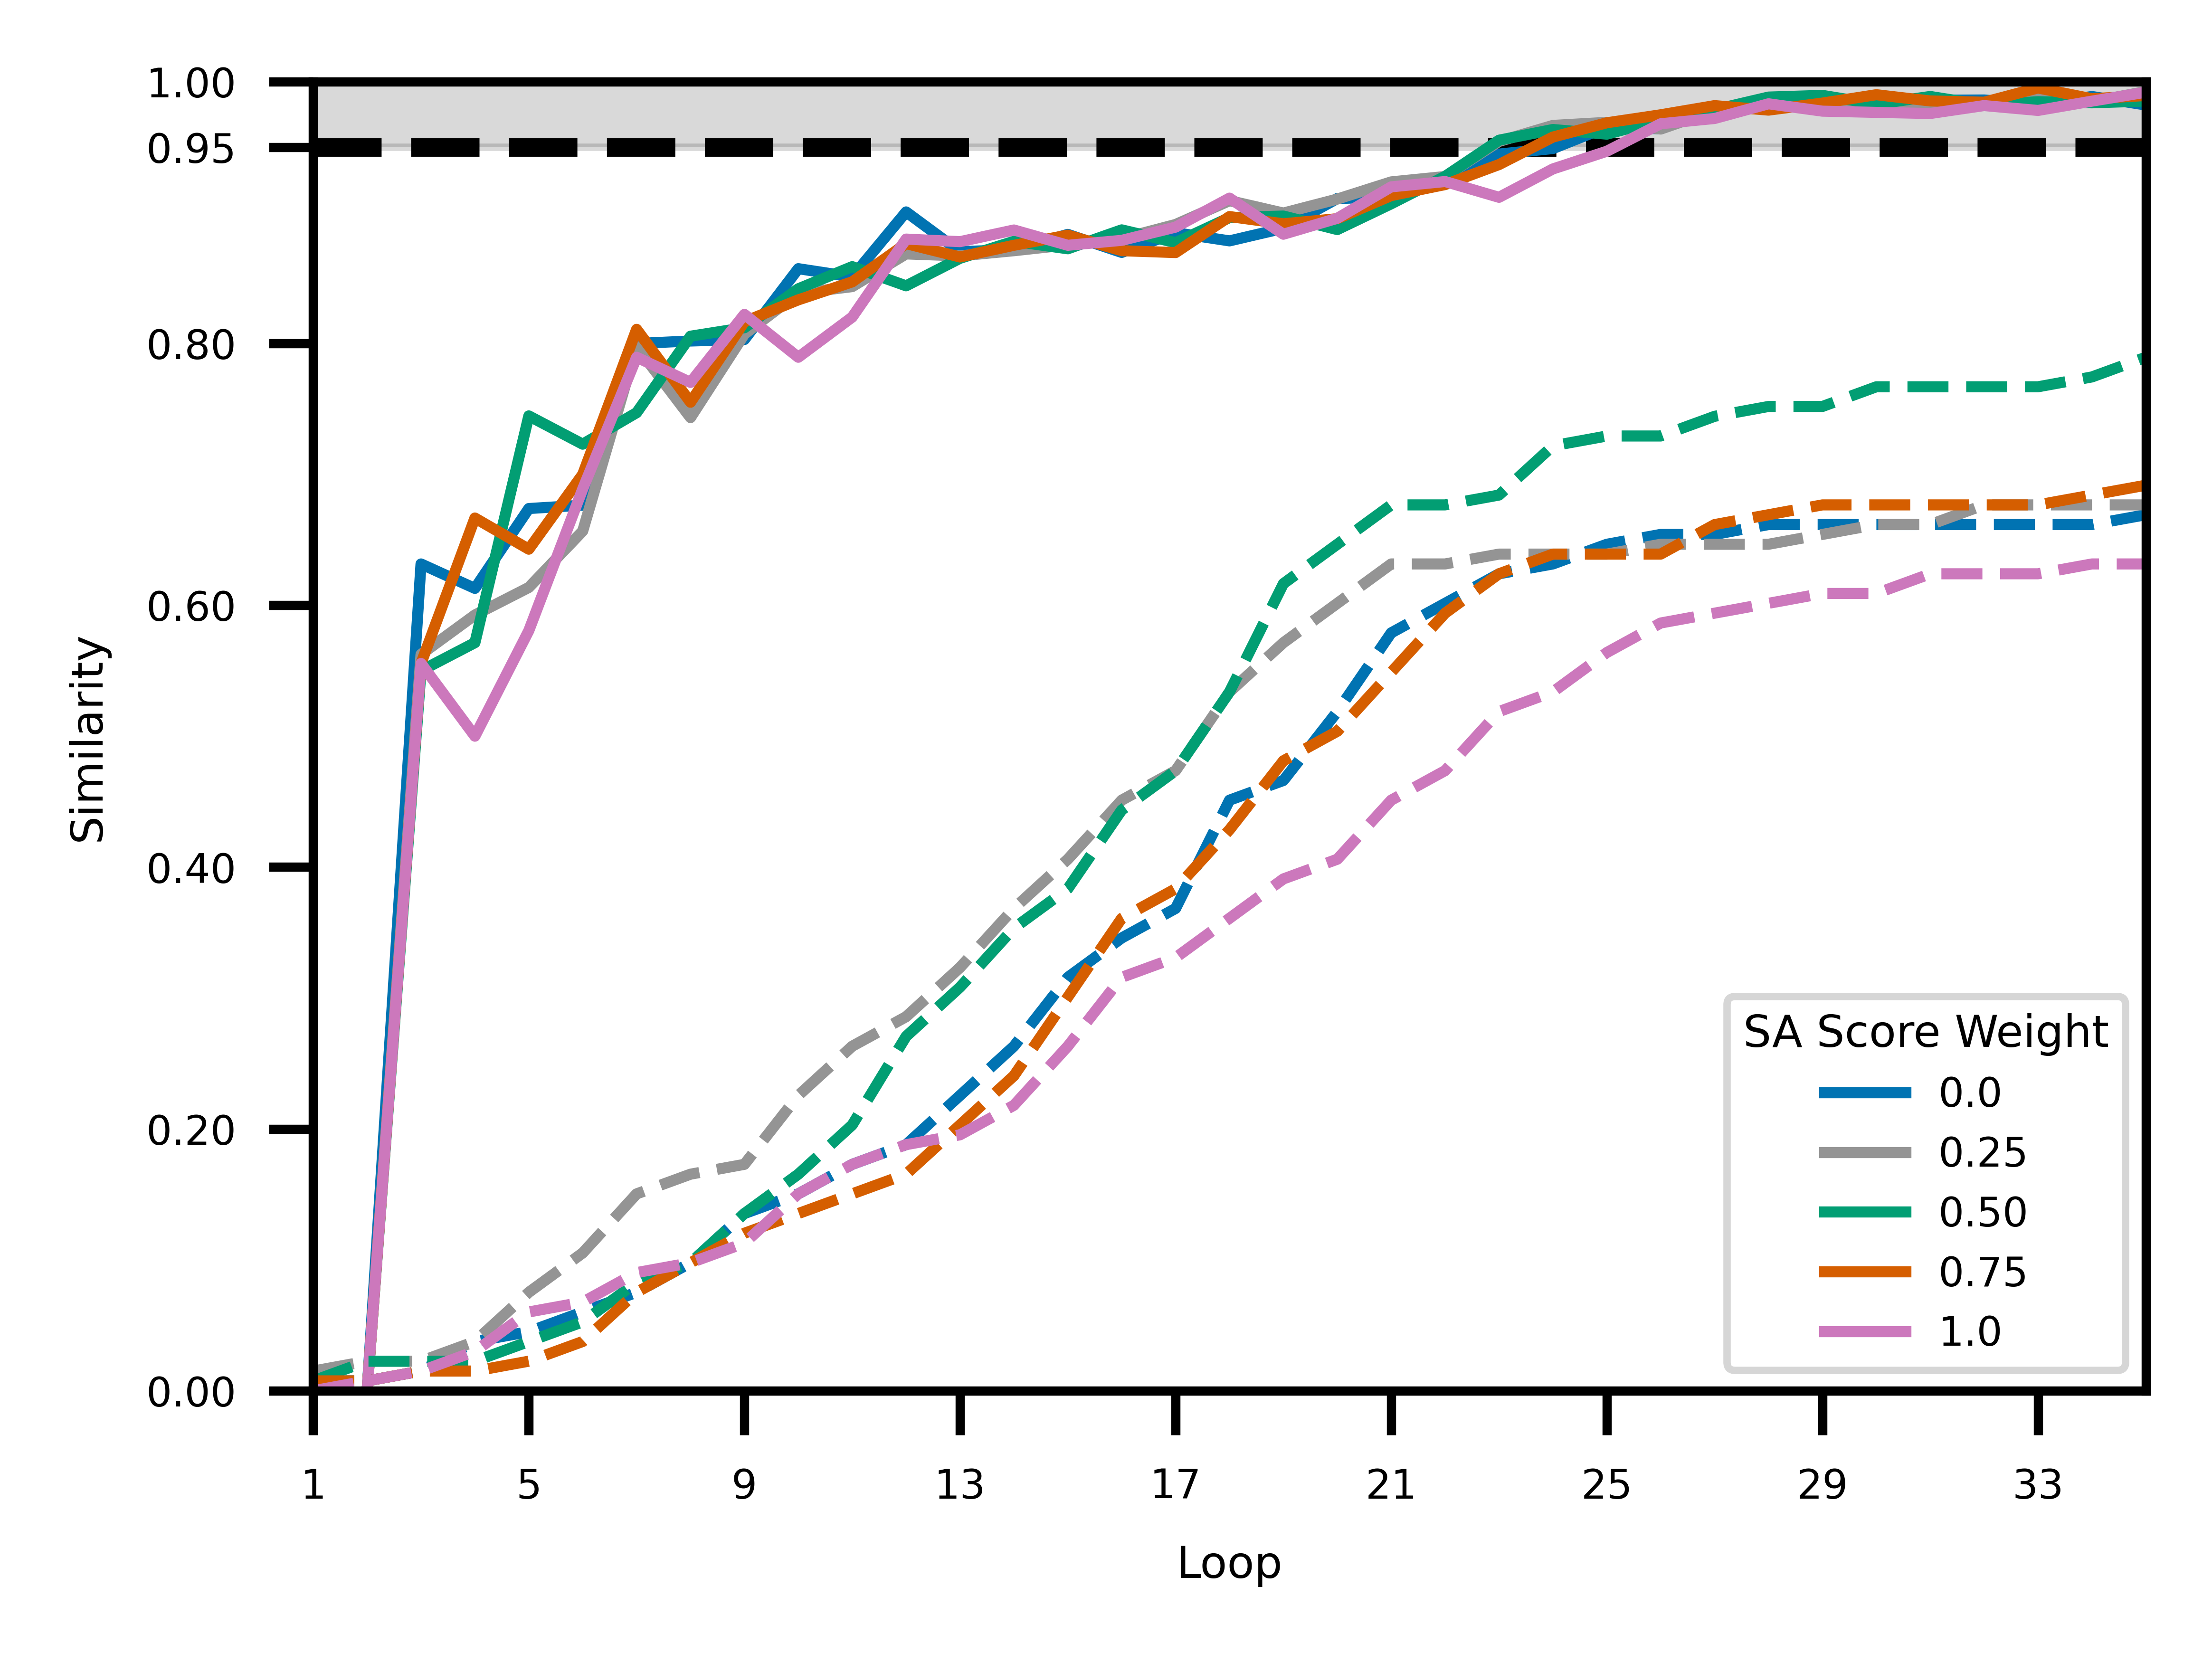

In [48]:
# Create the line plot
fig = plt.figure(figsize=(width, height), dpi=1400)
ax1 = fig.add_axes([0.1,0.1,1,1])
sns.set_context("paper", font_scale=0.5)
#fig, ax1 = plt.subplots(figsize=(9, 6))
# Increase line thickness by setting linewidth parameter
line_width = 5

# Plot y1, y2, and y3 on the left y-axis
#line5, = ax1.plot(x, y5, marker='x', linestyle='-.', color='orange', label='Molecules Matching in total λ Manual Set')
ax1.set_xlabel('Loop')
ax1.set_ylabel('Similarity')
#ax1.set_title('Genetic Algorithm Similarity Percentage')
ax1.set_ylim(0, 1)  # Set the y-axis range from 0 to 100
ax1.set_xlim(0, 34)  # Set the x-axis range from 1 to 46
ax1.set_xticks(range(0, len(run_1_sim['Name']), 4))
ax1.grid(False)
# Add a red box that covers x=23 to x=34
#ax1.axvspan(23, 34, color='blue', alpha=0.2)
#ax1.axvspan(34, 45, color='red', alpha=0.2)
# Create a secondary y-axis for y4
#ax2 = ax1.twinx()
# Add a horizontal line at y=95
ax1.axhline(y=0.95, color='black', linestyle='--', linewidth=2, label='y=95')
ax1.set_yticks(list(ax1.get_yticks()) + [0.95])
ax1.axhspan(0.95, 1, color='black', alpha=0.15)
line1, = ax1.plot(run_1_sim['Name'], run_1_sim['Similarity Percentage'], linestyle='-', color=blind[0], label='0.0')
line2, = ax1.plot(run_5_sim['Name'], run_5_sim['Similarity Percentage'], linestyle='-', color=blind[7], label='0.25')
line3, = ax1.plot(run_2_sim['Name'], run_2_sim['Similarity Percentage'], linestyle='-', color=blind[2], label='0.50')
line4, = ax1.plot(run_3_sim['Name'], run_3_sim['Similarity Percentage'], linestyle='-', color=blind[3], label='0.75')
line5, = ax1.plot(run_4_sim['Name'], run_4_sim['Similarity Percentage'], linestyle='-', color=blind[4], label='1.0')

line6, = ax1.plot(list(percent_match_1.keys()), list(percent_match_1.values()), linestyle='--', color=blind[0], label='Run Funnel Match')
line10, = ax1.plot(list(percent_match_5.keys()), list(percent_match_5.values()), linestyle='--', color=blind[7], label='Run Funnel Match')
line7, = ax1.plot(list(percent_match_2.keys()), list(percent_match_2.values()), linestyle='--', color=blind[2], label='Run Funnel Match')
line8, = ax1.plot(list(percent_match_3.keys()), list(percent_match_3.values()), linestyle='--', color=blind[3], label='Run Funnel Match')
line9, = ax1.plot(list(percent_match_4.keys()), list(percent_match_4.values()), linestyle='--', color=blind[4], label='Run Funnel Match')

lines = [line1, line2, line3, line4, line5]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, title="SA Score Weight", loc='lower right', bbox_to_anchor=(1, 0.0))

plt.tight_layout()
plt.savefig('GA_similarity_progress_SA_score_weighting.png', dpi=1400, bbox_inches='tight')
plt.show()